In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly.express as px
import pprint
import pickle


In [26]:
df = pd.read_csv("./datasets/test.csv", index_col=0)
df.head

<bound method NDFrame.head of           id  Gender      Customer Type  Age   Type of Travel     Class  \
0      19556  Female     Loyal Customer   52  Business travel       Eco   
1      90035  Female     Loyal Customer   36  Business travel  Business   
2      12360    Male  disloyal Customer   20  Business travel       Eco   
3      77959    Male     Loyal Customer   44  Business travel  Business   
4      36875  Female     Loyal Customer   49  Business travel       Eco   
...      ...     ...                ...  ...              ...       ...   
25971  78463    Male  disloyal Customer   34  Business travel  Business   
25972  71167    Male     Loyal Customer   23  Business travel  Business   
25973  37675  Female     Loyal Customer   17  Personal Travel       Eco   
25974  90086    Male     Loyal Customer   14  Business travel  Business   
25975  34799  Female     Loyal Customer   42  Personal Travel       Eco   

       Flight Distance  Inflight wifi service  \
0                  1

In [27]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


Формулировка задачи, целевая переменная и честный hold-out

In [28]:
df.shape

(25976, 24)

In [29]:
# no dublicates
df.drop_duplicates
df.shape

(25976, 24)

In [30]:
df = df.drop(['id'], axis='columns')


In [31]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [32]:
df.nunique()


Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3281
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           5
Food and drink                          6
Online boarding                         6
Seat comfort                            5
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         5
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            313
Arrival Delay in Minutes              320
satisfaction                            2
dtype: int64

In [33]:
non_num_cols = df.select_dtypes(exclude=['number']).columns
print(non_num_cols)

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')


In [34]:
for i in non_num_cols:
    print(f"unique values in { i }: {df[i].unique()}  |  {df[i].nunique()}")


unique values in Gender: ['Female' 'Male']  |  2
unique values in Customer Type: ['Loyal Customer' 'disloyal Customer']  |  2
unique values in Type of Travel: ['Business travel' 'Personal Travel']  |  2
unique values in Class: ['Eco' 'Business' 'Eco Plus']  |  3
unique values in satisfaction: ['satisfied' 'neutral or dissatisfied']  |  2


In [35]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Customer Type'] = df['Customer Type'].map({'disloyal Customer': 0, 'Loyal Customer': 1})
df['Type of Travel'] = df['Type of Travel'].map({'Business travel': 0, 'Personal Travel': 1})
df['Class'] = df['Class'].map({'Eco': 0, 'Eco Plus': 1, 'Business': 2})
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

In [36]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,52,0,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,1,36,0,2,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,0,0,20,0,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,0,1,44,0,2,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,1,1,49,0,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [37]:
for i in df.columns:
    print(f"dtype of {i} | {df[i].dtypes}")



dtype of Gender | int64
dtype of Customer Type | int64
dtype of Age | int64
dtype of Type of Travel | int64
dtype of Class | int64
dtype of Flight Distance | int64
dtype of Inflight wifi service | int64
dtype of Departure/Arrival time convenient | int64
dtype of Ease of Online booking | int64
dtype of Gate location | int64
dtype of Food and drink | int64
dtype of Online boarding | int64
dtype of Seat comfort | int64
dtype of Inflight entertainment | int64
dtype of On-board service | int64
dtype of Leg room service | int64
dtype of Baggage handling | int64
dtype of Checkin service | int64
dtype of Inflight service | int64
dtype of Cleanliness | int64
dtype of Departure Delay in Minutes | int64
dtype of Arrival Delay in Minutes | float64
dtype of satisfaction | int64


In [38]:
df.dtypes

Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [39]:
# no cat columns
df.select_dtypes(exclude=['number']).columns

Index([], dtype='object')

In [40]:
# Arrival Delay in Minutes 83 (NaN)
df.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [41]:
df[df.isna().any(axis=1)]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
516,1,1,21,1,0,632,1,5,1,4,...,2,4,2,5,4,5,2,9,NaN,0
656,0,1,9,1,0,762,2,5,2,2,...,4,2,5,2,5,2,4,51,NaN,0
1071,0,0,25,0,0,1017,3,4,4,5,...,5,2,5,2,3,2,5,126,NaN,0
1224,0,1,7,1,0,399,4,5,4,4,...,4,4,3,1,1,4,4,0,NaN,0
1589,1,1,58,0,0,129,5,3,3,3,...,5,5,5,5,3,5,5,3,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24072,0,1,45,0,0,352,5,1,1,1,...,5,1,1,1,3,2,5,26,NaN,1
24133,1,1,29,0,2,3873,3,3,3,3,...,3,3,4,4,4,3,3,19,NaN,0
24301,0,0,38,0,2,759,3,3,3,1,...,4,3,3,5,5,4,4,0,NaN,1
25128,1,1,52,0,2,3659,5,5,5,5,...,5,5,5,5,3,5,3,0,NaN,1


In [42]:
df = df.dropna()

In [43]:
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [44]:
df.shape

(25893, 23)

Checking for Correlation 

In [45]:
corr = df.corr(numeric_only=True)
print(corr)

                                     Gender  Customer Type       Age  \
Gender                             1.000000      -0.027804 -0.009222   
Customer Type                     -0.027804       1.000000  0.294139   
Age                               -0.009222       0.294139  1.000000   
Type of Travel                    -0.018892       0.307960 -0.030018   
Class                              0.003454       0.105489  0.140741   
Flight Distance                    0.005131       0.229226  0.099918   
Inflight wifi service              0.005954      -0.001359  0.009116   
Departure/Arrival time convenient -0.008485       0.206527  0.031898   
Ease of Online booking            -0.002021       0.012484  0.013728   
Gate location                      0.005138       0.001890  0.002677   
Food and drink                     0.014657       0.047509  0.024613   
Online boarding                    0.055609       0.188781  0.202648   
Seat comfort                       0.047656       0.143126  0.15

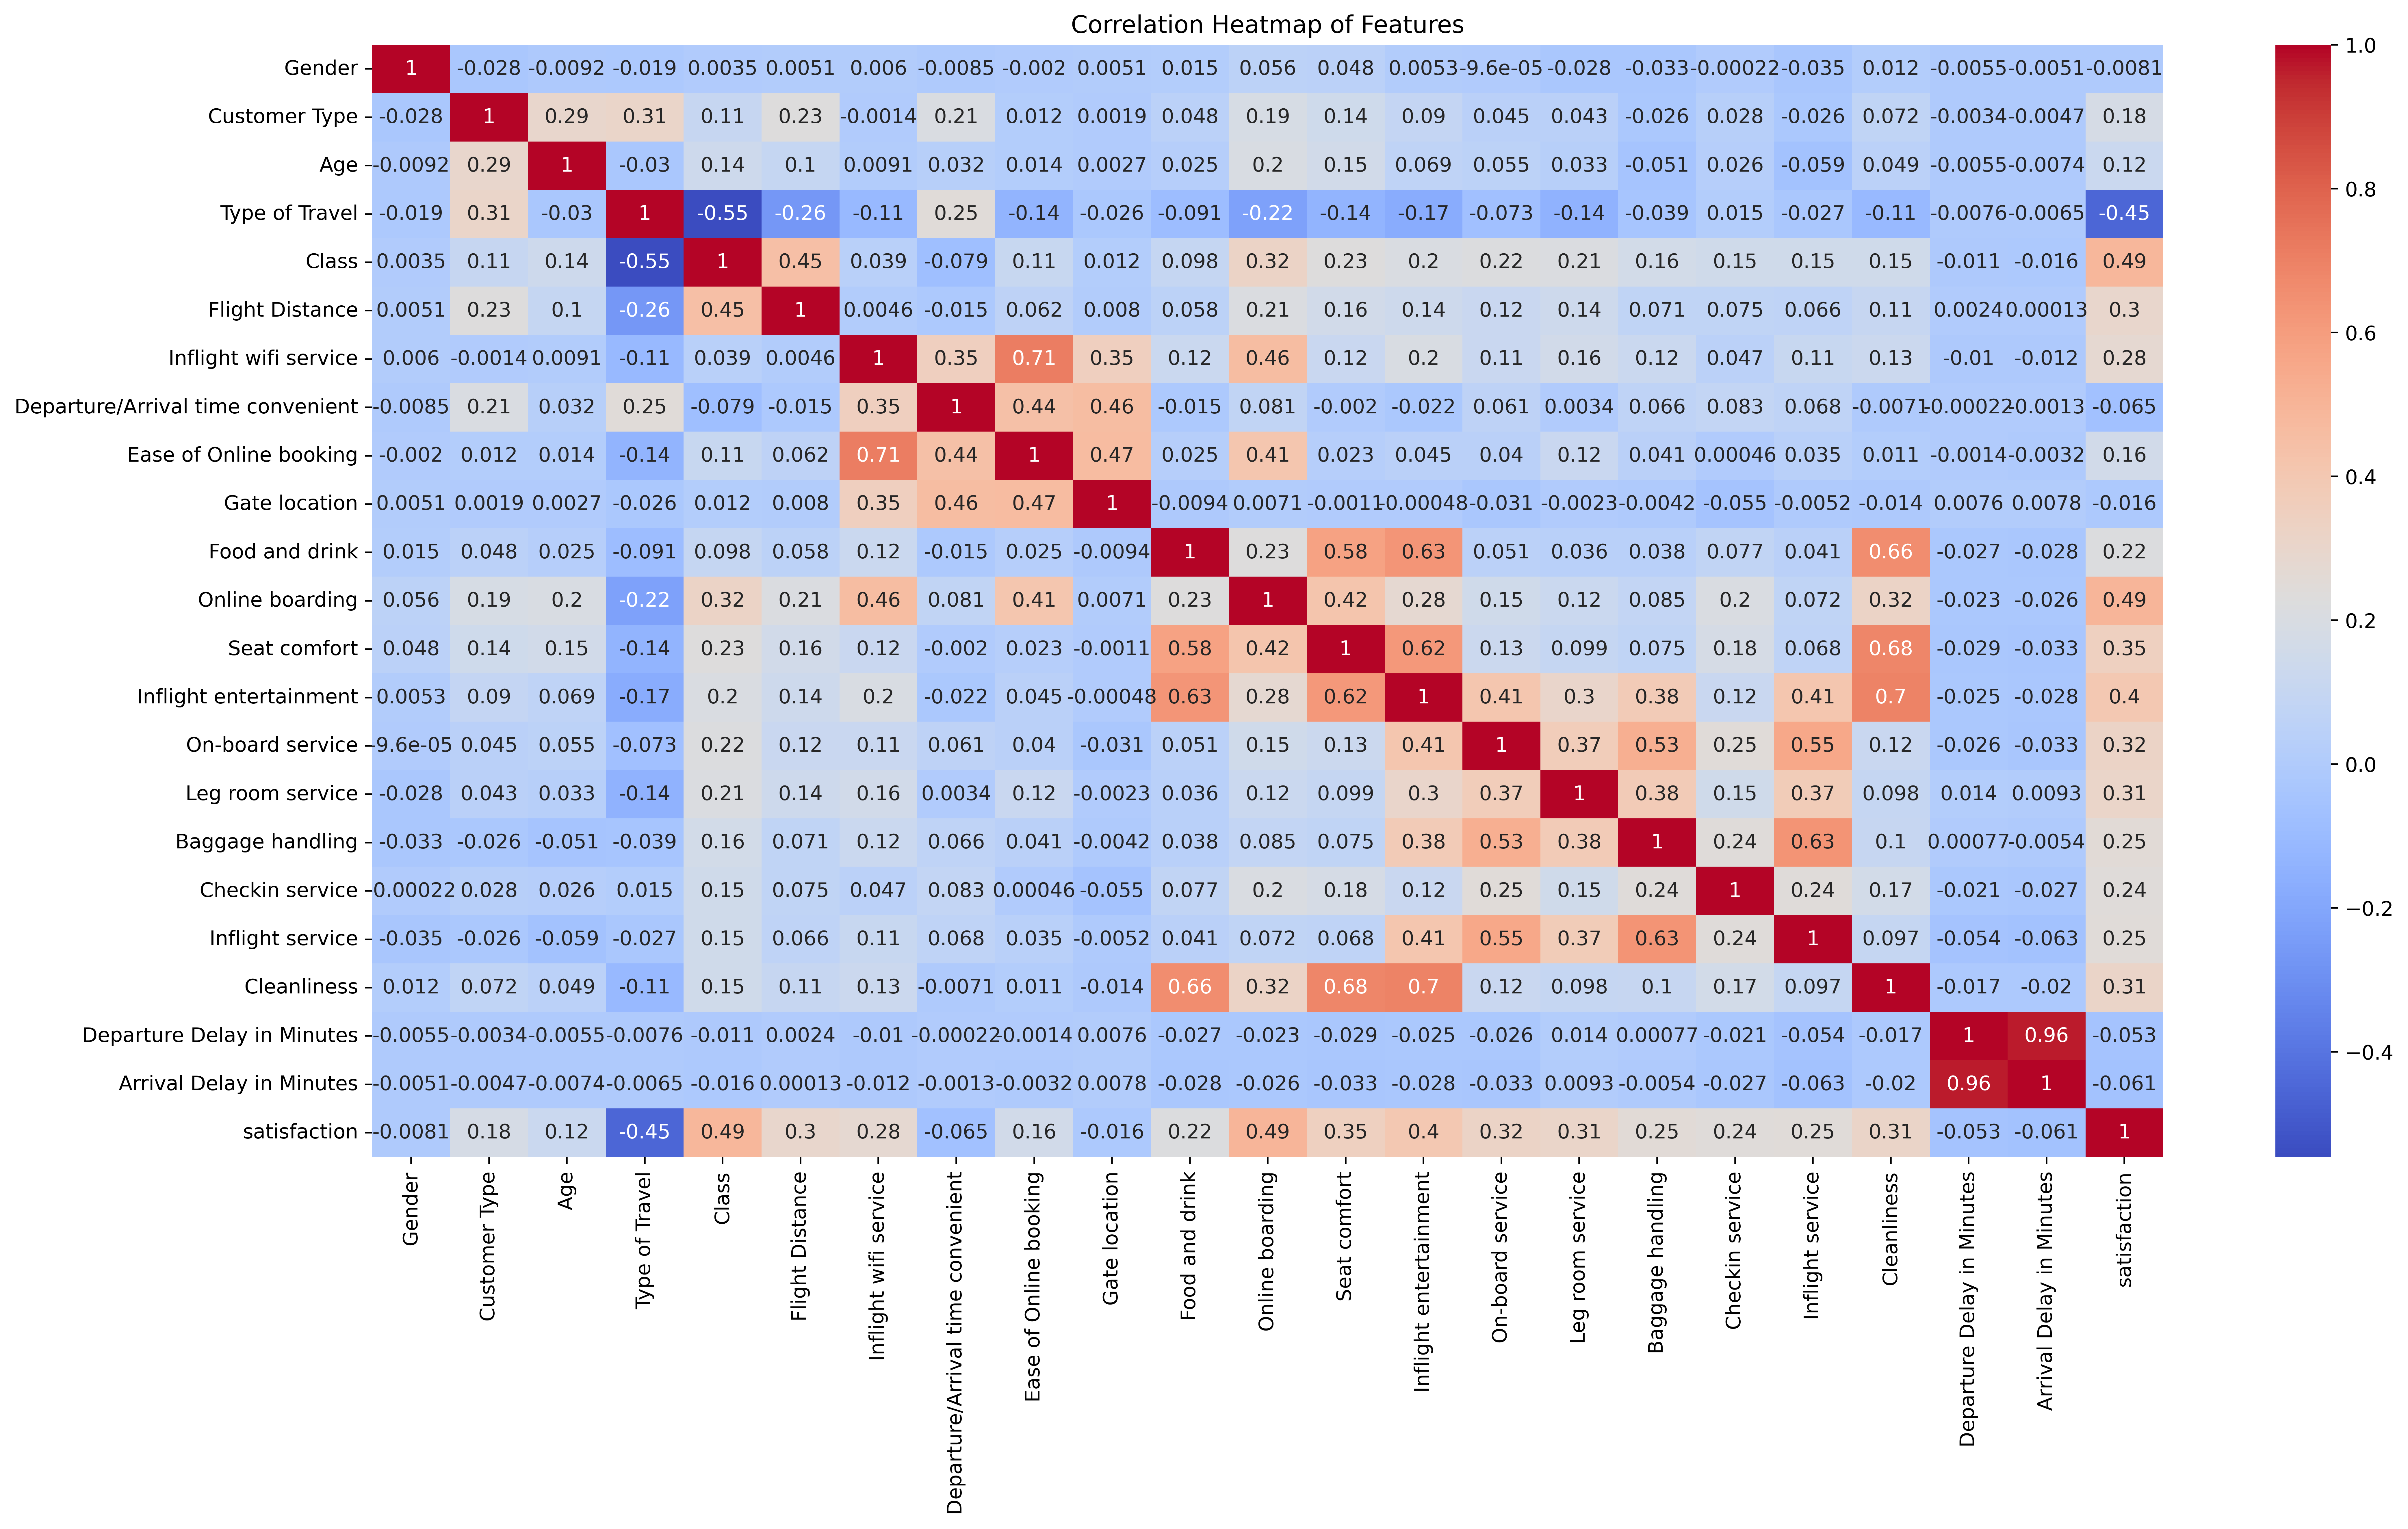

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap of Features")
plt.show()

In [57]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

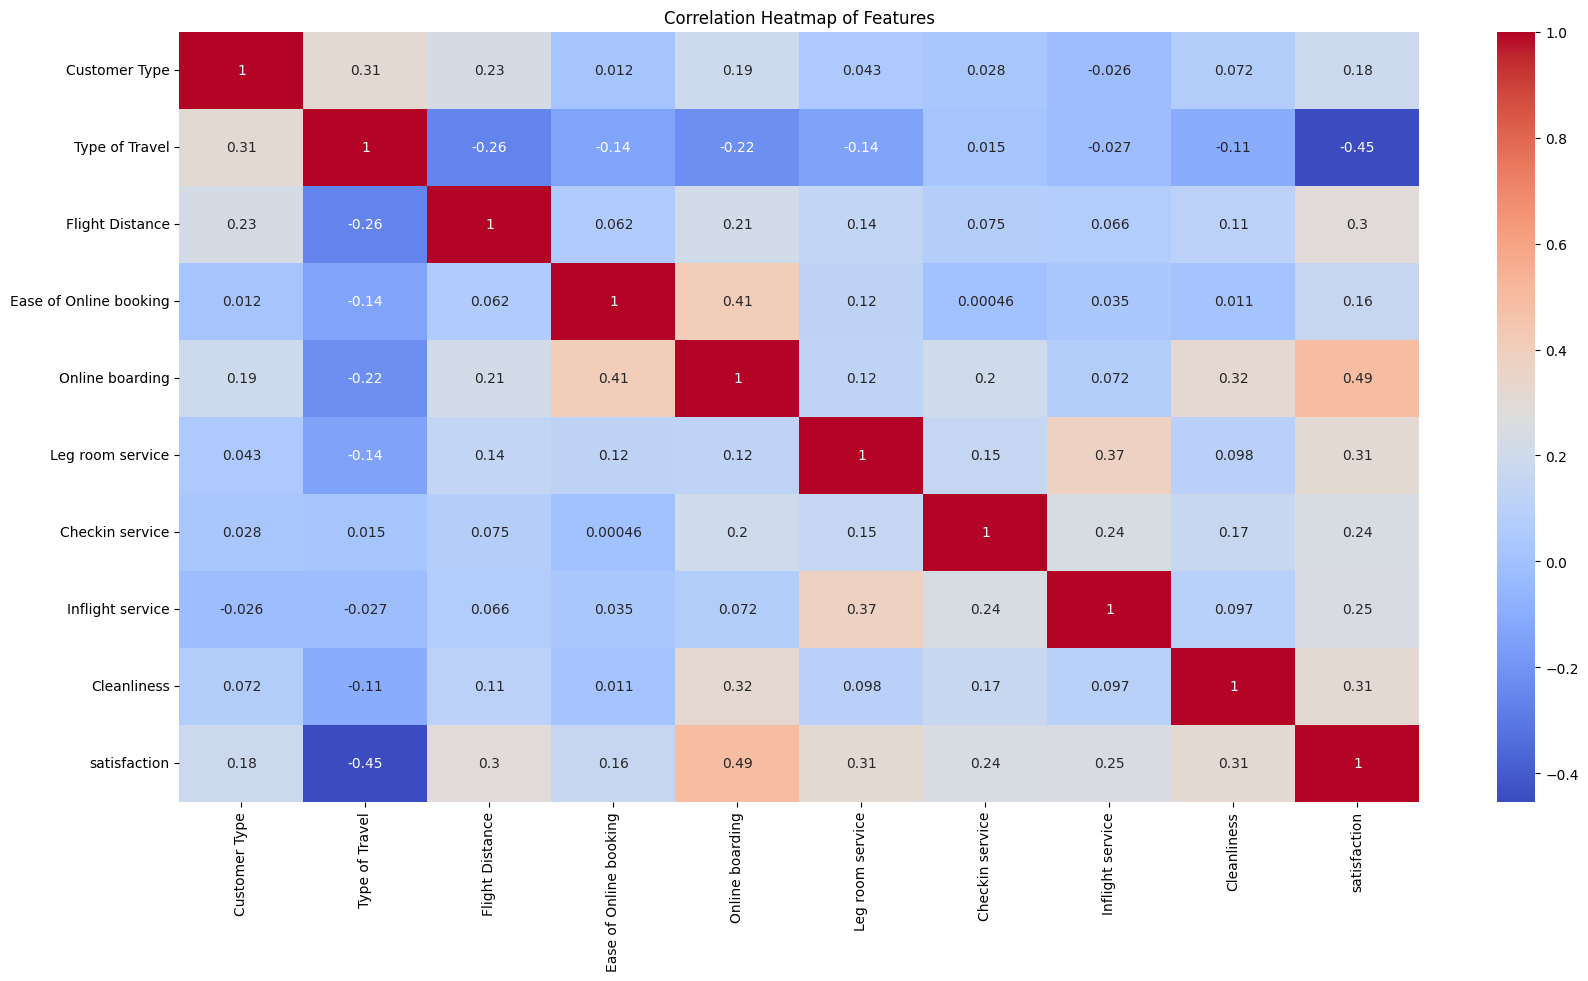

In [64]:
df = df.drop(columns=['Age'])

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap of Features")
plt.show()

In [ ]:
len(df.columns)

10

In [70]:
X = df.drop(columns='satisfaction')
y = df['satisfaction']

In [71]:
X.shape, y.shape

((25893, 9), (25893,))

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.3)

In [81]:
df.columns


Index(['Customer Type', 'Type of Travel', 'Flight Distance',
       'Ease of Online booking', 'Online boarding', 'Leg room service',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction'],
      dtype='object')

Data Audit

In [83]:
df.info(), df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 25893 entries, 0 to 25975
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Customer Type           25893 non-null  int64
 1   Type of Travel          25893 non-null  int64
 2   Flight Distance         25893 non-null  int64
 3   Ease of Online booking  25893 non-null  int64
 4   Online boarding         25893 non-null  int64
 5   Leg room service        25893 non-null  int64
 6   Checkin service         25893 non-null  int64
 7   Inflight service        25893 non-null  int64
 8   Cleanliness             25893 non-null  int64
 9   satisfaction            25893 non-null  int64
dtypes: int64(10)
memory usage: 2.2 MB


(None,
 Customer Type             0
 Type of Travel            0
 Flight Distance           0
 Ease of Online booking    0
 Online boarding           0
 Leg room service          0
 Checkin service           0
 Inflight service          0
 Cleanliness               0
 satisfaction              0
 dtype: int64)

In [ ]:
df['satisfaction'].value_counts(normalize=True)

satisfaction
0    0.561078
1    0.438922
Name: proportion, dtype: float64

Standardize the data

In [97]:
df.describe().T[['min', 'max', 'mean', 'std']]

,min,max,mean,std
Customer Type,0.0,1.0,0.815317,0.388048
Type of Travel,0.0,1.0,0.305604,0.460672
Flight Distance,31.0,4983.0,1193.753254,998.626779
Ease of Online booking,0.0,5.0,2.755996,1.412552
Online boarding,0.0,5.0,3.261615,1.355505
Leg room service,0.0,5.0,3.349786,1.319045
Checkin service,1.0,5.0,3.313907,1.269138
Inflight service,0.0,5.0,3.648824,1.180650
Cleanliness,0.0,5.0,3.285521,1.319355
satisfaction,0.0,1.0,0.438922,0.496265


In [98]:
def standartize_data(X_train, X_test):

    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)


    X_train = (X_train - mean) / std
    X_test  = (X_test - mean) / std

    return X_train, X_test



X_train, X_test = standartize_data(X_train, X_test)



In [100]:
X_train.describe().T[['min', 'max', 'mean', 'std']]

,min,max,mean,std
Customer Type,-2.098186,0.476602,9.565375e-17,1.000028
Type of Travel,-0.664171,1.505637,1.364242e-16,1.000028
Flight Distance,-1.162728,3.791315,-6.037163e-17,1.000028
Ease of Online booking,-1.950901,1.590136,1.364242e-16,1.000028
Online boarding,-2.392473,1.283777,6.585996e-17,1.000028
Leg room service,-2.549086,1.250123,3.998640e-17,1.000028
Checkin service,-1.818632,1.334186,-1.568094e-18,1.000028
Inflight service,-3.097356,1.144780,-1.387763e-16,1.000028
Cleanliness,-2.491377,1.304155,-1.568094e-17,1.000028


In [ ]:
class MyLogisticRegression:
    def __init__(self, lr = 0.01, n_iter = 1000):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)

        self.bias = 0

        for _ in range(self.n_iter):

            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias-= self.lr * db


    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)
    

    def predict(self, X, threshold=0.5):
        y_pred_proba = self.predict_proba(X)
        return (y_pred_proba >= threshold).astype(int)
    

    

In [109]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

In [113]:
model = MyLogisticRegression(lr=0.1, n_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(f"W: {model.weights}" )
print(f"b: {model.bias}")




Accuracy: 0.8613542739443872
W: [ 0.71839763 -1.48412648  0.04795062 -0.0716645   1.00362349  0.45268676
  0.46256221  0.52083567  0.38261605]
b: -0.4711319788911995


In [110]:
y_proba = model.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.8613542739443872
Precision: 0.8636502598593703
Recall: 0.8174189814814815
F1-score: 0.8398989148208711
ROC AUC: 0.9147730627920361


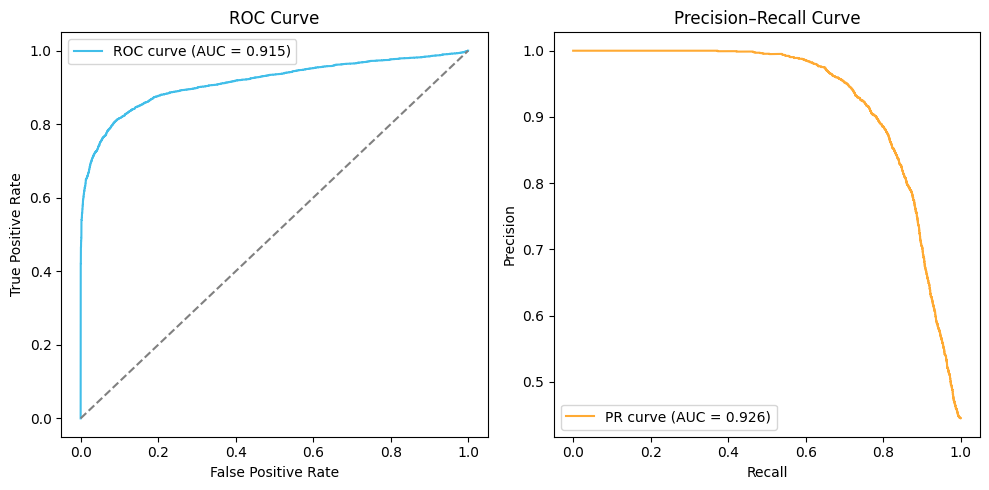

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# 1️⃣ Get probabilities for the positive class
y_proba = model.predict_proba(X_test)

# If your function returns 2D (for class 0 and 1)
# then take the second column:
if y_proba.ndim > 1:
    y_proba = y_proba[:, 1]

# 2️⃣ ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# 3️⃣ Precision–Recall data
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

# 4️⃣ Plot
plt.figure(figsize=(10,5))

# ROC curve
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})", color="#41BEE9")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# Precision–Recall curve
plt.subplot(1,2,2)
plt.plot(recall, precision, label=f"PR curve (AUC = {pr_auc:.3f})", color="#FFAA33")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()

plt.tight_layout()
plt.show()
